In [ ]:
# Add relevant Jupyter notebook extensions 

In [ ]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [ ]:
# Import relevant modules

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

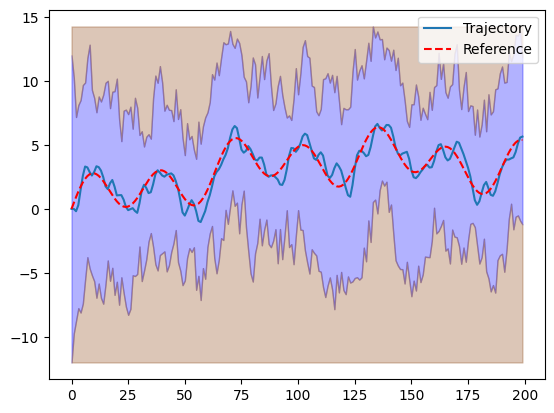

In [106]:
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt

# ensure project root is on sys.path
proj_root = r"C:\Users\grace\OneDrive\Documents\Uni Stuff\Third Year\B1 Engineering Computation\Scientific Coding\b1-coding-practical-mt24"
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

from uuv_mission.dynamic import Submarine, ClosedLoop, Mission

# try to import controller; fallback if missing
try:
    from uuv_mission.control import PDController
except Exception:
    class PDController:
        def __init__(self, kp: float = 0.15, kd: float = 0.6):
            self.kp = float(kp)
            self.kd = float(kd)
            self._prev_error = 0.0
            self._first_call = True

        def reset(self):
            self._prev_error = 0.0
            self._first_call = True

        def __call__(self, reference: float, observation: float) -> float:
            error = float(reference) - float(observation)
            if self._first_call:
                d_error = 0.0
                self._first_call = False
            else:
                d_error = error - self._prev_error
            u = self.kp * error + self.kd * d_error
            self._prev_error = error
            return u

# configure and run once
KP, KD = 0.15, 0.6
controller = PDController(kp=KP, kd=KD)
mission = Mission.random_mission(duration=200, scale=4.0)

sub = Submarine()
closed_loop = ClosedLoop(sub, controller)
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.2)

# single plot call
trajectory.plot_completed_mission(mission)
plt.show()